## Obtaining the Efficient Frontier

<b>What is an Efficient Frontier?</b>
- An efficient frontier is a set of investment portfolios that are expected to provide the highest returns at a given level of risk. A portfolio is said to be efficient if there is no other portfolio that offers higher returns for a lower or equal amount of risk. Where portfolios are located on the efficient frontier depends on the investor’s degree of risk tolerance.

<b>How Does an Efficient Frontier Work?</b>
- It is represented by plotting the expected returns of a portfolio and the standard deviation of returns. The y-axis is made up of the expected returns of the portfolio. The x-axis is labeled as the standard deviation of returns, which is a measure of risk.

- A portfolio is then plotted onto the graph according to its expected returns and standard deviation of returns. The portfolio is compared to the efficient frontier. If a portfolio is plotted on the right side of the chart, it indicates that there is a higher level of risk for the given portfolio. If it is plotted low on the graph, the portfolio offers low returns.

<b>Significance of an Efficient Frontier</b>
- The efficient frontier is the foundation for modern portfolio theory, which is the idea of how investors aim to create a portfolio that maximizes expected returns based on a specific level of risk. It helps investors understand the potential risks and returns in their portfolios and analyze how they compare to the optimal set of portfolios that are considered to be efficient. Doing so helps investors to accordingly change their investing strategies by understanding the level of risk that pertains to each portfolio.

- It should be noted that there is no single efficient frontier for everyone. Each one is different for every investor because it depends on multiple factors – such as the number of assets in the portfolio, the industry of the assets, and the degree of the investor’s risk tolerance

#### Phase 1:

Downloading the data from Yahoo Finance API
Tickers: 
- Walmart (FMGC), 
- Facebook (Tech), 
- British Petroleum (Energy)

Computing Portfolio Returns, Variance & Standard Deviation

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yf.download(a, start = '2014-1-1')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<b>Assigning random weights to portfolio </b>

In [2]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.37086401, 0.23548151, 0.39365448])

<b> Now, estimate the expected Portfolio Return, Variance, and Volatility. </b>

Expected Portfolio Return:

In [3]:
# Portfolio Return = (Weights * Mean of returns) * 250 
#[250 ---> No. of trading days]
np.sum(weights * log_returns.mean()) * 250

0.0889489405033583

Expected Portfolio Variance:

In [4]:
#Portfolio Variance = Matrix Multiplication - Dot product
#Transpose of Weights' Matrix   x   Annualized Covariance of log returns   x   Weights
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.038060873304254485

Covariance is nothing but a measure of correlation. Correlation refers to the scaled form of covariance. Covariance indicates the direction of the linear relationship between variables. Correlation on the other hand measures both the strength and direction of the linear relationship between two variables.

Expected Portfolio Volatility:

In [5]:
#Square root of variance
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.19509196114718433

***

#### Phase 2
Simulations for Efficient Frontier

1) Creating two empty lists. Naming them pf_returns and pf_volatilites.

In [6]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [7]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
#pf_returns, pf_volatilities

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [8]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

#pf_returns, pf_volatilities

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [9]:
portfolio = pd.DataFrame({'Return':pf_returns, 'Volatility':pf_volatilities})

In [10]:
portfolio

,Return,Volatility
0,0.110225,0.207206
1,0.163739,0.218557
2,0.153391,0.205975
3,0.162303,0.206721
4,0.039101,0.257524
...,...,...
995,0.075488,0.202630
996,0.150351,0.243716
997,0.070095,0.207289
998,0.117472,0.233076


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

Text(0, 0.5, 'Return')

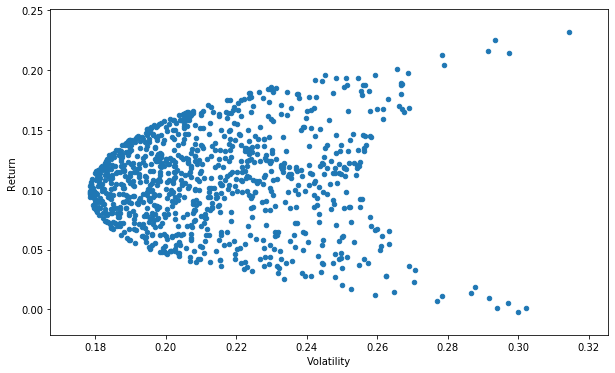

In [11]:
portfolio.plot(x='Volatility',y='Return',kind='scatter',figsize=(10,6))
plt.xlabel('Volatility')
plt.ylabel('Return')

******

<b> How would you interpret the obtained graph? </b>
![https://github.com/aditiversha/Efficient-Frontier/blob/main/Efficient-frontier-new(2).jpg)

*****

<b>Limitations of an Efficient Frontier</b>
- The efficient frontier is built on assumptions that may not accurately portray realistic situations. For example, it assumes that all investors think rationally and avoid risks. It also assumes that fluctuations in market prices do not depend on the number of investors, and all investors enjoy equal access to borrowing money at a risk-free interest rate.
- Such assumptions are not always true, as some investors may not make rational decisions, and some investors are high risk-takers. Not all investors obtain equal access to borrowing money as well.
- Additionally, it assumes that asset returns result in a normal distribution. However, in reality, asset returns often do not follow a normal distribution, as it often varies three standard deviations away from the mean.